# 1.Import Data

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt

In [2]:
data = np.abs(round(pd.read_csv('Data/Raw/data_all.csv'),6))
data= data.rename(columns = {'wspd':'prev_wspd','nxt_wspd':'wspd'})
data

,prev_displ,prev_vell,prev_accl,prev_wspd,displ,vell,accl,wspd,act,dispm,velm,accm,dispm_0,velm_0,accm_0
0,24.0,24.0,26.0,3.0,13.0,24.0,27.0,3.0,10.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
1,24.0,24.0,26.0,3.0,13.0,23.0,27.0,3.0,20.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
2,24.0,24.0,26.0,3.0,13.0,23.0,27.0,3.0,30.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
3,24.0,24.0,26.0,3.0,13.0,23.0,26.0,3.0,40.0,0.000107,0.000142,0.000336,0.000108,0.000142,0.000336
4,24.0,24.0,26.0,3.0,13.0,23.0,26.0,3.0,50.0,0.000107,0.000146,0.000336,0.000108,0.000142,0.000336
5,24.0,24.0,26.0,3.0,14.0,23.0,26.0,3.0,60.0,0.000107,0.000158,0.000381,0.000108,0.000142,0.000336
6,24.0,24.0,26.0,3.0,14.0,24.0,26.0,3.0,70.0,0.000112,0.000170,0.000434,0.000108,0.000142,0.000336
7,24.0,24.0,26.0,3.0,13.0,24.0,26.0,3.0,80.0,0.000117,0.000182,0.000485,0.000108,0.000142,0.000336
8,24.0,24.0,26.0,3.0,13.0,24.0,26.0,3.0,90.0,0.000121,0.000193,0.000534,0.000108,0.000142,0.000336
9,24.0,24.0,26.0,3.0,13.0,24.0,26.0,3.0,100.0,0.000126,0.000204,0.000582,0.000108,0.000142,0.000336


In [7]:
#reward function = Ucondi/Uuncondi if 
for j in ['disp','vel','acc']:
    data['r_'+j] = np.abs(data[j+'m']/data[j+'m_0'])
    # if no change reward = 0
    data.loc[data['r_'+j]==1,'r_'+j] = 0# - data['act']/2000
    data.loc[data['r_'+j]>1,'r_'+j] = -data.loc[data['r_'+j]>1,'r_'+j]# - data['act']/2000
    data.loc[(data['r_'+j]<1)&(data['r_'+j]>0),'r_'+j] = 1/data.loc[data['r_'+j]<1,'r_'+j]# - data['act']/2000
    
    

In [17]:
for j in ['disp','vel','acc']:
    data['r_'+j] = (data[j+'m_0'] - data[j+'m'])*10**5 - data['act']/100 
        

# 2. Create Subset data

## 2.1 Check Data summary for rewards

In [18]:
for j in ['disp','vel','acc']:
    print(data['r_'+j].mean())
    print(data['r_'+j].median())
    print()

1.9858361297539056
1.7000000000000015

13.769661633109695
12.399999999999999

0.8884787472035821
-0.2



# 2.2 Separate the Data for models

In [19]:
for j in ['disp','vel','acc']:
    col_names = ['prev_'+j+'l', 'prev_wspd', j+'l', 'wspd', 'act', 'r_'+j]
    globals()[j] = round(data[col_names],6)
    eval(j)['state'] = list(zip( np.abs(eval(j)['prev_'+j+'l']),  eval(j)['prev_wspd']))
    eval(j)['state_p'] = list(zip( np.abs(eval(j)[j+'l']),  eval(j)['wspd']))
    globals()[j] = eval(j)[['state', 'state_p', 'act', 'r_'+j]].drop_duplicates()
    eval(j).to_csv('Data/{}.csv'.format(j))
# we have three datasets: disp, vel, acc, with s, s', a r
# disp

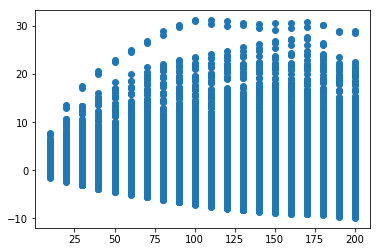

In [20]:
plt.scatter(eval('disp')['act'],eval('disp')['r_disp'])

(array([2.600e+01, 1.040e+02, 1.380e+02, 3.250e+02, 3.620e+02, 4.040e+02,
        5.700e+02, 6.600e+02, 8.270e+02, 1.339e+03, 1.883e+03, 2.556e+03,
        2.961e+03, 3.501e+03, 2.896e+03, 2.697e+03, 2.371e+03, 2.246e+03,
        2.194e+03, 1.332e+03, 8.270e+02, 5.790e+02, 3.690e+02, 1.790e+02,
        1.380e+02, 1.240e+02, 1.210e+02, 1.160e+02, 6.100e+01, 6.200e+01,
        5.300e+01, 5.000e+01, 4.600e+01, 2.400e+01, 3.300e+01, 3.200e+01,
        2.700e+01, 3.100e+01, 3.500e+01, 1.600e+01, 1.700e+01, 9.000e+00,
        6.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 7.000e+00,
        7.000e+00, 1.000e+01]),
 array([-9.9  , -9.078, -8.256, -7.434, -6.612, -5.79 , -4.968, -4.146,
        -3.324, -2.502, -1.68 , -0.858, -0.036,  0.786,  1.608,  2.43 ,
         3.252,  4.074,  4.896,  5.718,  6.54 ,  7.362,  8.184,  9.006,
         9.828, 10.65 , 11.472, 12.294, 13.116, 13.938, 14.76 , 15.582,
        16.404, 17.226, 18.048, 18.87 , 19.692, 20.514, 21.336, 22.158,
        22.98 , 

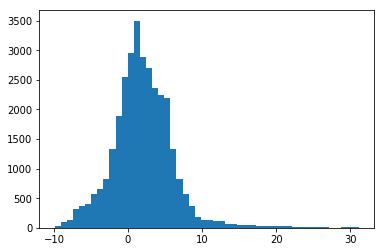

In [21]:
plt.hist(eval('disp')['r_disp'],bins=50)

In [22]:
#check the total states vs observed next states
for j in [disp,vel,acc]:
    print('total samples:',len(j))
    print('total unique current state:', len(set(j['state'])))
    print('total unique next state:',len(set(j['state_p'])))
    print()

total samples: 32389
total unique current state: 282
total unique next state: 373

total samples: 33547
total unique current state: 200
total unique next state: 276

total samples: 28031
total unique current state: 180
total unique next state: 286



In [34]:
for i in data.columns:
    print(i,':',len(set(data[i])))
# 20 actions
# 395 displacement
# 675 velocity
# 1026 acceleration

prev_displ : 44
prev_vell : 36
prev_accl : 35
prev_wspd : 10
displ : 50
vell : 46
accl : 45
wspd : 10
act : 20
dispm : 257
velm : 779
accm : 2545
dispm_0 : 269
velm_0 : 696
accm_0 : 1220
r_disp : 1003
r_vel : 2936
r_acc : 4968


## 2.3 Unique Value of (parameter, wind_speed)

In [35]:
for i in ['displ','vell','accl']:
    temp = set(pd.concat([data['prev_'+i],data[i]], axis=0,ignore_index=True))
    print(len(temp))
    temp2 = set(pd.concat([data['prev_wspd'],data['wspd']], axis=0,ignore_index=True))
    print(len(temp2))
    globals()['unique_{}'.format(i)] = [(j,k) for j in range(1,51) for k in range(1,11)]
len(unique_displ),len(unique_vell),len(unique_accl)
#(2000, 2000, 2000)

50
10
46
10
45
10


(500, 500, 500)

# 4. Dictionarized all (disp/vel/acc, wind) to s1,s2...

In [36]:
#create dictionary for each state
for i in ['unique_displ','unique_vell','unique_accl']:
  my_list = eval(i)
  globals()['dict_'+i] = dict() 
  for index,value in enumerate(my_list):
    eval('dict_'+i)[index+1] = value
#dict_unique_prev_displ
len(dict_unique_displ.keys())
# dict_unique_displ

500

## 4.1 Conver the tuple states into a dictionarized states 

In [ ]:
for i in ['disp','vel','acc']:
    print(i)
    index = 0
    temp = eval(i)
    dic_i = eval('dict_unique_'+i+'l')
    key_list = list(dic_i.keys())
    val_list = list(dic_i.values())

    temp['s'] = 0
    temp['s_p'] = 0

    for z in range(len(temp)):
        j = temp['state'].iloc[z]
        k = temp['state_p'].iloc[z]
        position_s = val_list.index(j)
        position_s_p = val_list.index(k)
        temp['s'].iloc[index] = key_list[position_s]
        temp['s_p'].iloc[index] = key_list[position_s_p]
        index +=1
    temp['a'] = temp['act']/10
    temp['a']  = temp['a'].astype(int)
    globals()[i] = temp
#my_dict_unique_displ.get()

In [ ]:
disp

In [76]:
for i in ['disp','vel','acc']:
    globals()[i+'o'] = eval(i)[['s','a','r_'+i,'s_p']].rename(columns={ 'r_'+i: 'r','s_p' : 'sp'})

In [77]:
dispo

,s,a,r,sp
0,926,1,1.004346,506
1,926,2,0.999346,506
2,926,3,0.994346,506
3,926,4,0.989346,506
4,926,5,0.984346,526
...,...,...,...,...
23835,1238,16,2.729524,1097
23836,1238,17,2.747000,1097
23837,1238,18,2.764839,1097
23838,1238,19,2.218725,1217


# 4.2 Save the Data to Data file
* csv
* Dictionary

In [78]:
for i in ['disp','vel','acc']:
    eval(i+'o').to_csv('Data/Version_from_python/{}.csv'.format(i+'o'),index=False)

    dic_i = eval('dict_unique_'+i+'l')
    a_file = open("Data/Version_from_python/{}_dic.json".format(i), "w")
    json.dump(dic_i, a_file)
    a_file.close()

### Loading Test

In [79]:
for i in ['disp','vel','acc']:
    a_file = open("Data/Version_from_python/{}_dic.json".format(i), "r")
    output = a_file.read()
    globals()['{}_dic'.format(i)]=output
#dict_unique_displ

In [80]:
a_file = open("Data/Version_from_python/disp_dic.json", "r")
a_dictionary = json.load(a_file)

In [81]:
a_dictionary['1']

[1, 1]

In [35]:
len(disp_dic)
disp_dic[1]

'"'

In [36]:
# ratio =  max(DO) / max(NOTHING)
    # if ratio = 1 -> reward = 0 + penalty
    # if ratio > 1 -> reward = -ratio + penalty
    # if ratio < 1 -> reward = 1/ratio + penalty

# reward = max(NOTHING) / max(DO) - Voltage / constant 